# <font color='289C4E'>Exploration Numérique 3
**Élèves**: Sadegh ABDERRAHIM & Gabriel PEREIRA DE CARVALHO & Otávio RIBAS

### <font color='289C4E'>Table des matières<font><a class='anchor' id='top'></a>
- [Python setup](#setup)
- [Exercice 1](#1)
- [Exercice 2](#2)
- [Exercice 3](#3)
- [Exercice 4](#4)
- [Exercice 5](#5)
- [Exercice 6](#6)
- [Exercice 7](#7)
- [Exercice 8](#8)
- [Exercice 9](#9)
- [Exercice 10](#10)
- [Exercice 11](#11)
- [Exercice 12](#12)
- [Exercice 13](#13)

<h2 align="center"> <font color='gray'>Python setup</font></h2> <a class="anchor" id="setup"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

On va installer le data set Breast-Cancer Wisconsin et créer les tableaux qu'on utilisera dans la suite.

In [2]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features
Y = breast_cancer_wisconsin_diagnostic.data.targets

In [4]:
X.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


On remarque que chaque attribut a 3 colonnes dans le dataset. Par exemple $\texttt{radius1}$, $\texttt{radius2}$ et $\texttt{radius3}$ pour l'attribut $\textbf{rayon}$.

- Colonne 1: valeur moyenne de l'échantillon
- Colonne 2: écart type
- Colonne 3: la valeur la plus élevé dans l'échantillon

In [5]:
X = X.iloc[:, 0:10]#on va s'interesser que à la moyenne de chaque attribut
df = pd.concat([X, Y], axis=1) #on va combiner X,Y dans un seul dataframe
df.columns = list(X.columns) + ['diagnosis']

#transformons la colonne diagnosis en un attribut binaire (M=-1, B=1)
df['diagnosis'] = df['diagnosis'].map({'M': -1, 'B': 1})

df.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,-1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,-1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,-1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,-1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,-1


<h2 align="center"> <font color='blue'>Exercice 1</font></h2> <a class="anchor" id="1"></a>

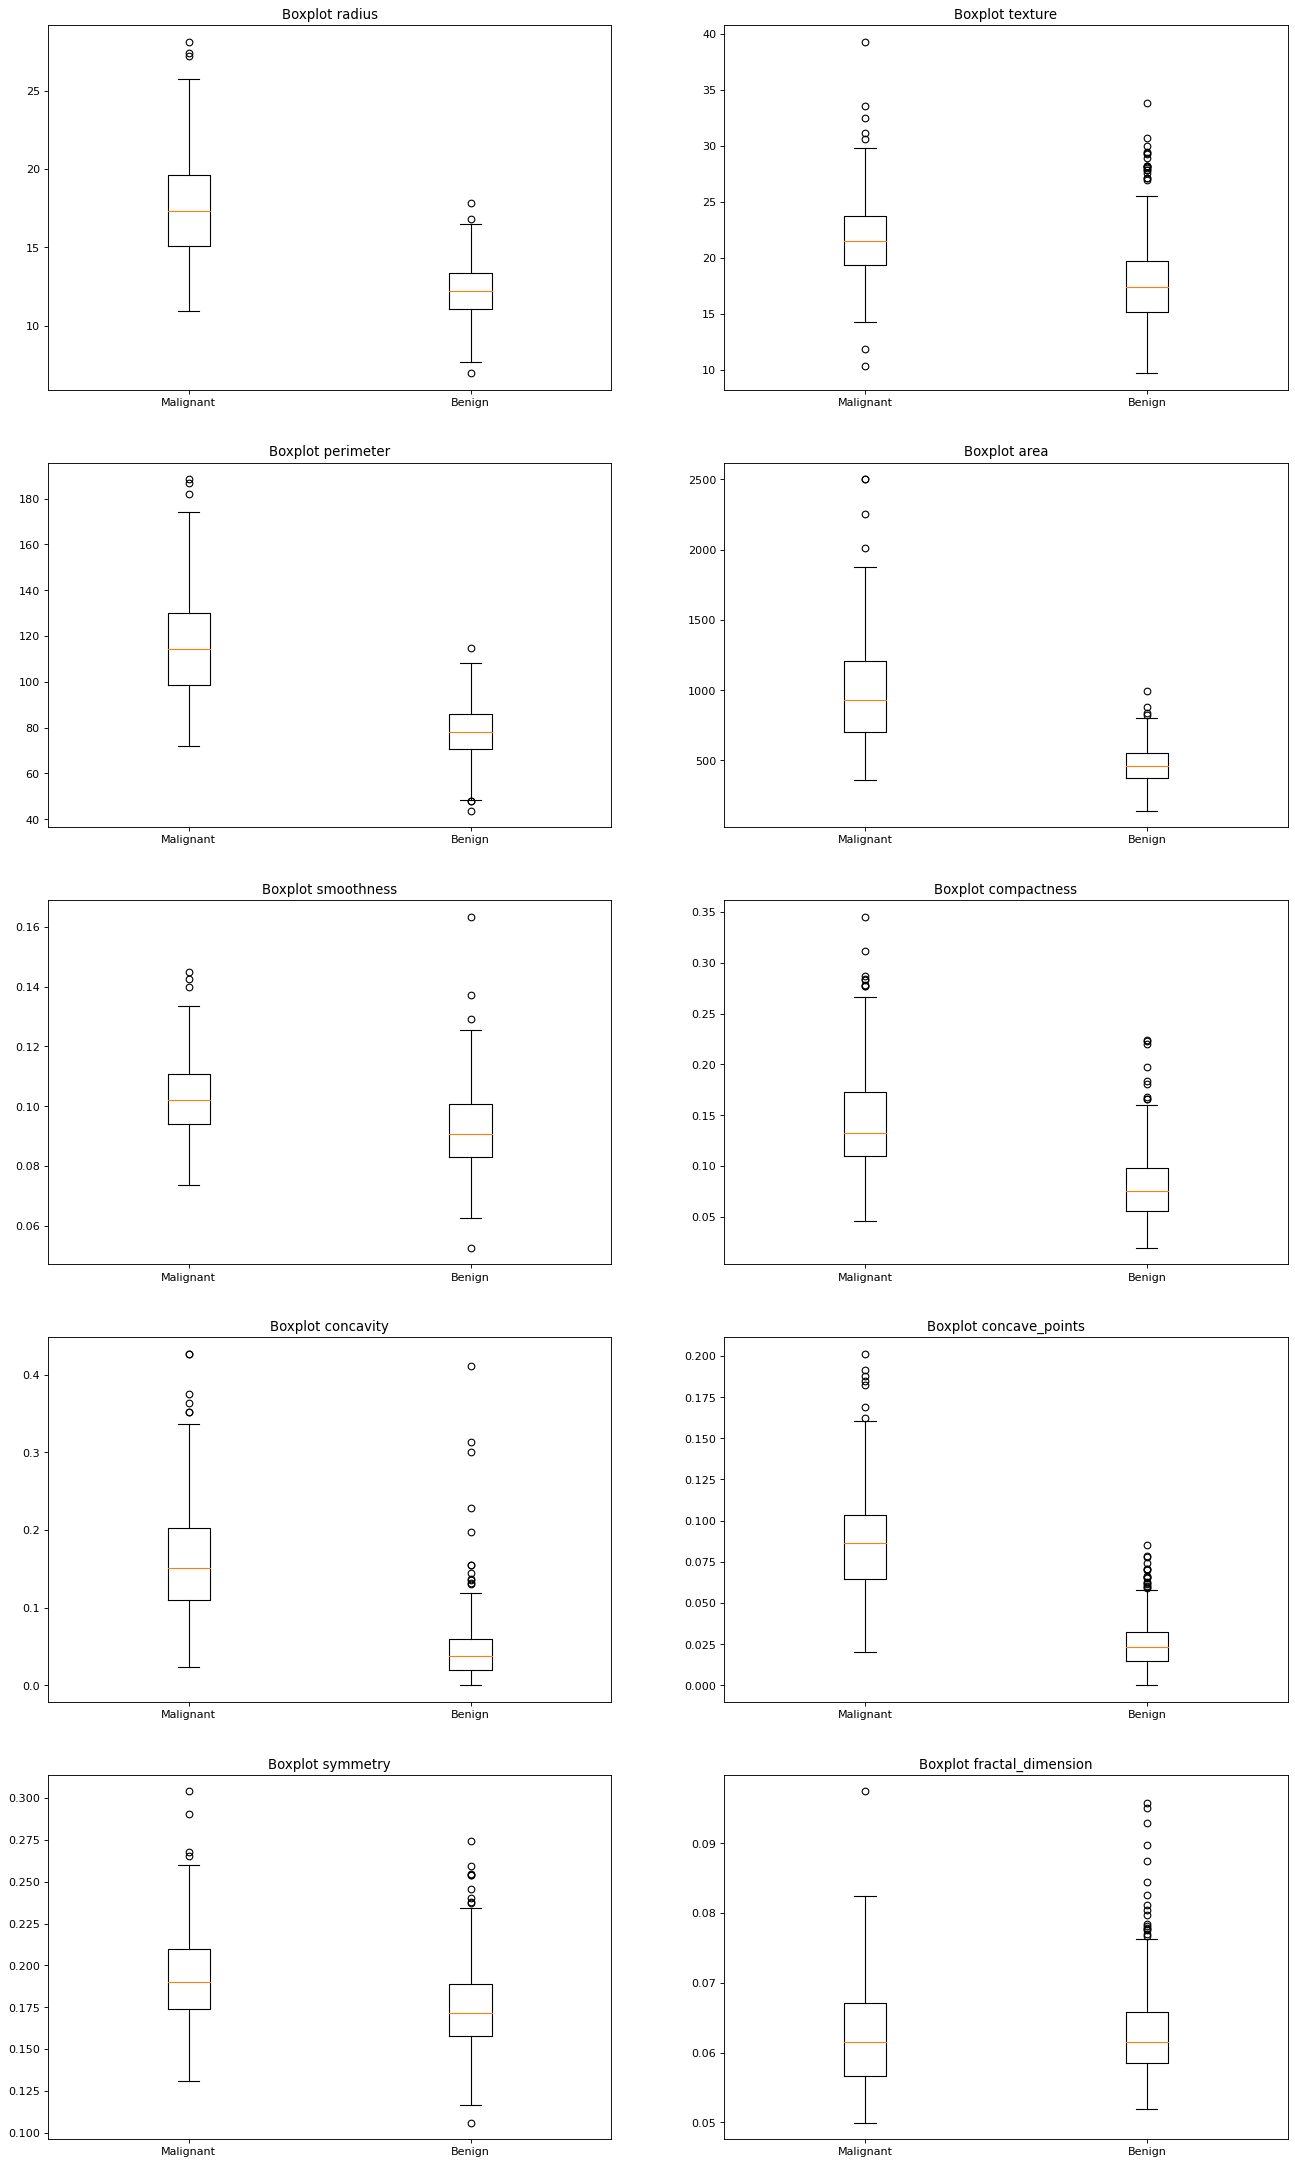

In [6]:
plt.figure(figsize=(20, 35), dpi=80)

for i, column in enumerate(df.columns[:-1]): #comme indiqué dans l'enoncé, on considère les attributs 1 a 10
    plt.subplot(5, 2, i+1)
    
    plt.title(f"Boxplot {column[:-1]}")
    plt.boxplot([df[df['diagnosis'] == -1][column], df[df['diagnosis'] == 1][column]], labels=['Malignant', 'Benign'])
    
plt.show()

Nous remarquons que pour tous les attributs, les échantillons présentant des tumeurs malignes ont des valeurs plus élevées en géneral. Comme indiqué dans le [paper](https://www.semanticscholar.org/paper/53f0fbb425bc14468eb3bf96b2e1d41ba8087f36):

> As with all the shape features, a higher value
corresponds to a less regular contour and thus to a higher probability of malignancy.

<h2 align="center"> <font color='blue'>Exercice 2</font></h2> <a class="anchor" id="2"></a>

Text(0.5, 1.0, 'Correlation Heatmap')

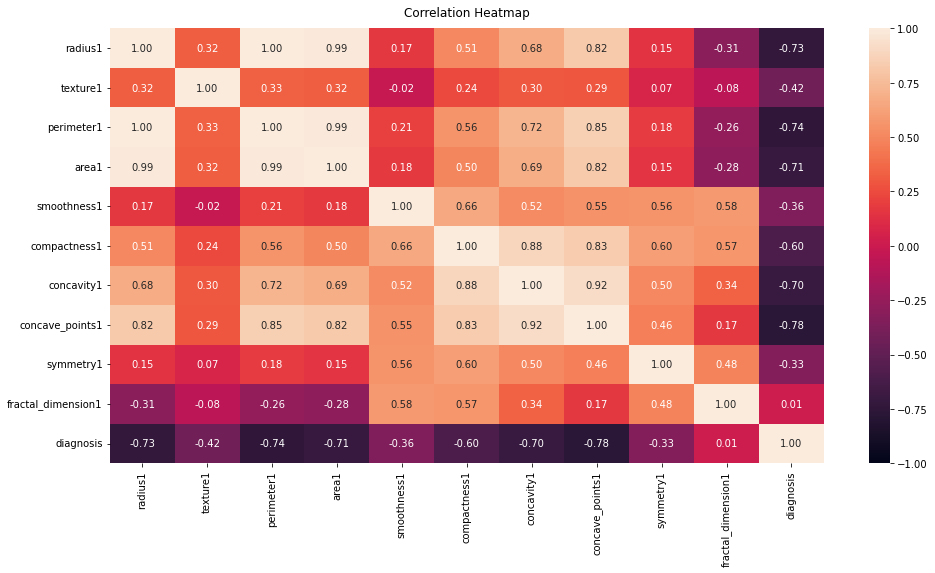

In [7]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<h2 align="center"> <font color='blue'>Exercice 3</font></h2> <a class="anchor" id="3"></a>

En observant le heatmap, on constate que le rayon, le périmètre et la superficie sont fortement corrélés ce qui est logique. Par conséquent, nous pouvons choisir n'importe laquelle de ces trois caractéristiques lors de la classification.

De manière similaire, la compacité moyenne, la concavité moyenne et les points concaves moyens sont fortement liés.

<h2 align="center"> <font color='blue'>Exercice 4</font></h2> <a class="anchor" id="4"></a>

In [8]:
cov = np.cov(X, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov)

# Alors, trions par valeur propre
sort_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_idx]
eigenvectors = eigenvectors[:, sort_idx]

A = eigenvectors[:, :3]

X_ACP = X.dot(A)
X_ACP.columns = ['ACP1', 'ACP2', 'ACP3']
df_ACP = pd.concat([X_ACP, df['diagnosis']], axis=1)
df_ACP.columns = list(X_ACP.columns) + ['diagnosis']
df_ACP.head(5) #visualisons le dataframe après ACP

,ACP1,ACP2,ACP3,diagnosis
0,1007.193105,39.578333,-38.819750,-1
1,1332.164050,36.804167,-25.644570,-1
2,1209.263281,43.320222,-27.410140,-1
3,390.650626,47.133621,-28.412440,-1
4,1303.366093,36.819088,-30.942566,-1


<h2 align="center"> <font color='blue'>Exercice 5</font></h2> <a class="anchor" id="5"></a>

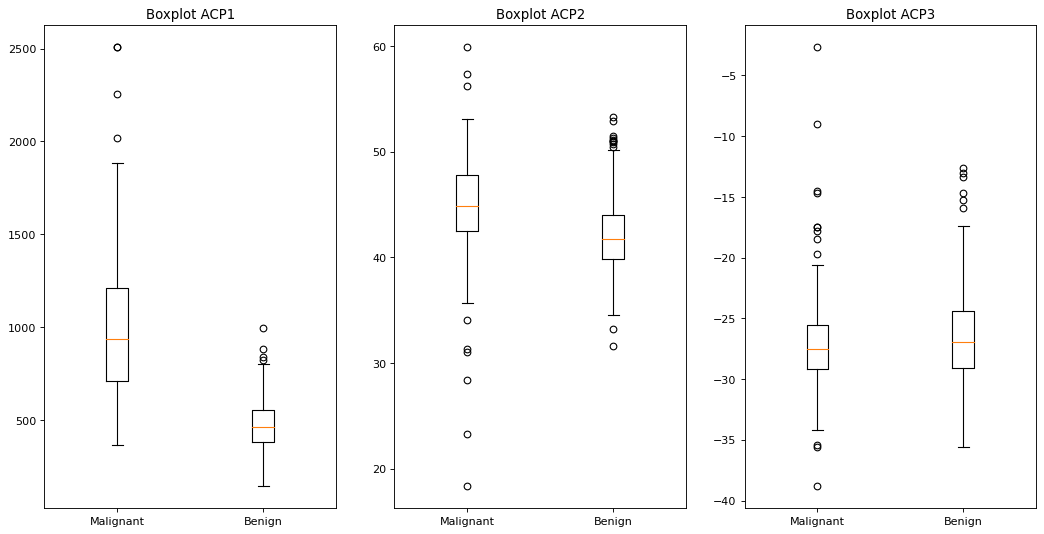

In [9]:
plt.figure(figsize=(16, 8), dpi=80)

for i, column in enumerate(df_ACP.columns[:-1]):
    plt.subplot(1, 3, i+1)
    
    plt.title(f"Boxplot {column}")
    plt.boxplot([df_ACP[df_ACP['diagnosis'] == -1][column], df_ACP[df_ACP['diagnosis'] == 1][column]], labels=['Malignant', 'Benign'])
    
plt.show()

<h2 align="center"> <font color='blue'>Exercice 6</font></h2> <a class="anchor" id="6"></a>

Text(0.5, 1.0, 'Correlation Heatmap')

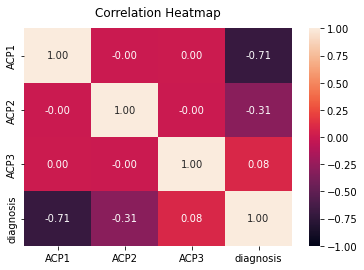

In [10]:
plt.figure()
heatmap = sns.heatmap(df_ACP.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Comme attendu, dans le dataframe après l'ACP, les variables sont décorrelées.

<h2 align="center"> <font color='blue'>Exercice 7</font></h2> <a class="anchor" id="7"></a>

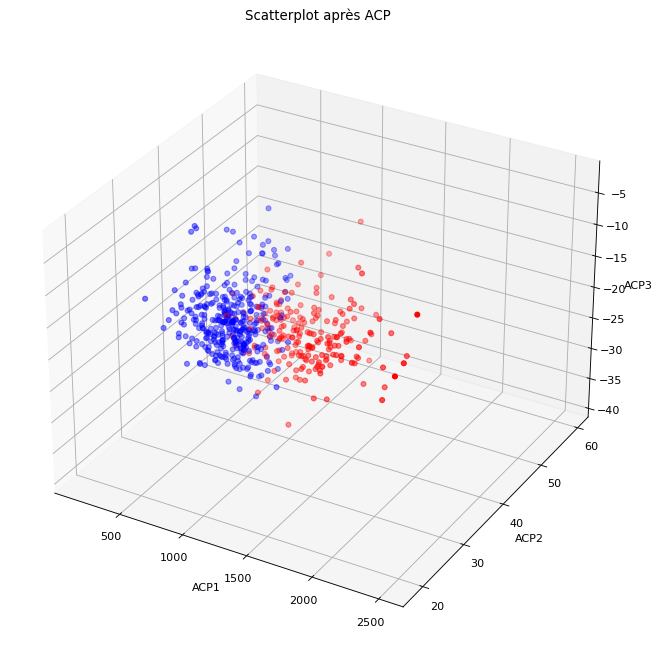

In [11]:
fig = plt.figure(figsize=(10, 20), dpi=80)
ax = plt.axes(projection='3d')

def color_by_diagnosis(diagnosis):
    return 'r' if diagnosis == -1 else 'b'

xdata = df_ACP['ACP1'].tolist()
ydata = df_ACP['ACP2'].tolist()
zdata = df_ACP['ACP3'].tolist()
colors = list(color_by_diagnosis(diagnosis) for diagnosis in df_ACP['diagnosis'])
ax.scatter3D(xdata, ydata, zdata, c = colors);

ax.set_title("Scatterplot après ACP")
ax.set_xlabel('ACP1')
ax.set_ylabel('ACP2')
ax.set_zlabel('ACP3')

plt.show()

<h2 align="center"> <font color='blue'>Exercice 8</font></h2> <a class="anchor" id="8"></a>

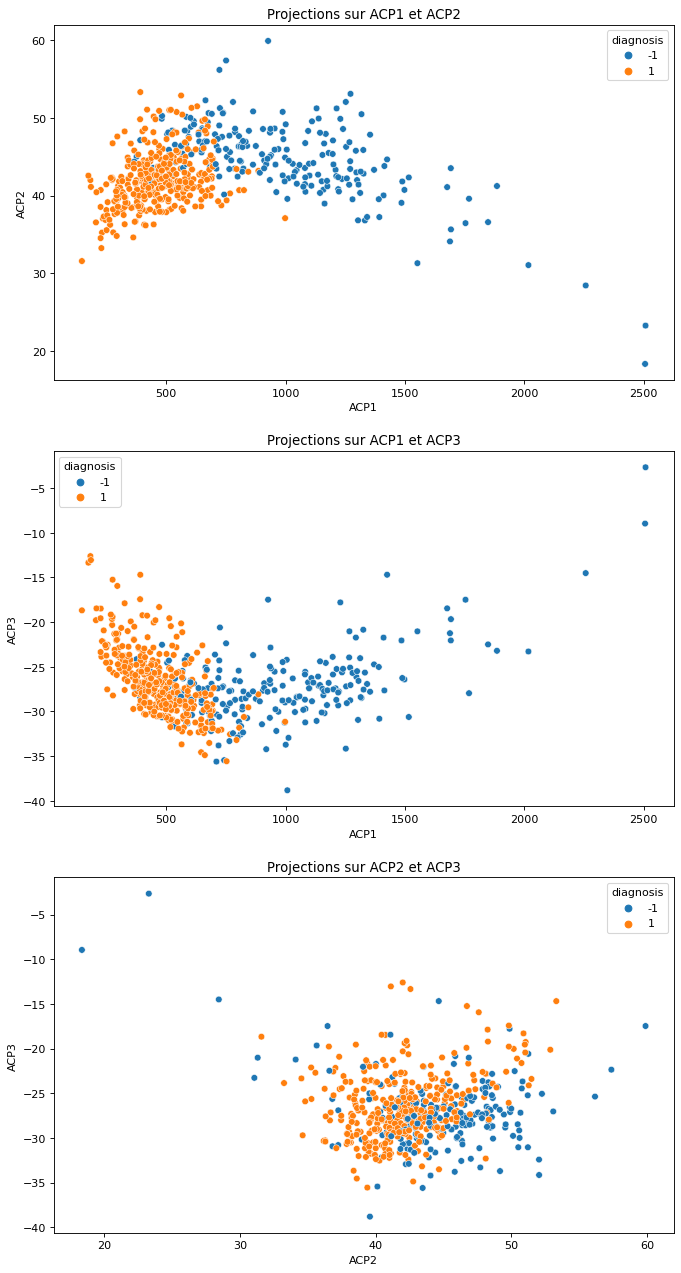

In [12]:
plt.figure(figsize=(10, 20), dpi=80)
df_ACP['diagnosis'] = df_ACP['diagnosis'].astype('category') #Convertir en type catégoriel.

plt.subplot(3, 1, 1)
plt.title("Projections sur ACP1 et ACP2")
sns.scatterplot(data=df_ACP, x='ACP1', y='ACP2', hue='diagnosis')

plt.subplot(3, 1, 2)
plt.title("Projections sur ACP1 et ACP3")
sns.scatterplot(data=df_ACP, x='ACP1', y='ACP3', hue='diagnosis')

plt.subplot(3, 1, 3)
plt.title("Projections sur ACP2 et ACP3")
sns.scatterplot(data=df_ACP, x='ACP2', y='ACP3', hue='diagnosis')

plt.show()

<h2 align="center"> <font color='blue'>Exercice 9</font></h2> <a class="anchor" id="9"></a>

<h2 align="center"> <font color='blue'>Exercice 10</font></h2> <a class="anchor" id="10"></a>

<h2 align="center"> <font color='blue'>Exercice 11</font></h2> <a class="anchor" id="11"></a>

<h2 align="center"> <font color='blue'>Exercice 12</font></h2> <a class="anchor" id="12"></a>

<h2 align="center"> <font color='blue'>Exercice 13</font></h2> <a class="anchor" id="13"></a>